In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

## image Classification

In [3]:
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [ ]:
train = False

In [4]:
if train:
    learn = vision_learner(dls, resnet34, metrics=error_rate)
    learn.fine_tune(1)

In [5]:
if train:
    learn.export("dog_vs_cat.pkl")  # !! puts it in with the dataset in ~.fastai/data/oxford-iiit-pet/images

In [6]:
if not train:
    learn.export(path.cwd()/"dog_vs_cat.pkl")

In [4]:
learn = load_learner("dog_vs_cat.pkl")
learn.dls = dls

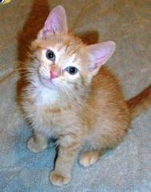

In [5]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [6]:
from fastai.vision.all import *
import ipywidgets
from ipywidgets import widgets
ipywidgets.__version__

'7.7.1'

In [7]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

Is this a cat?: True.
Probability it's a cat: 1.000000


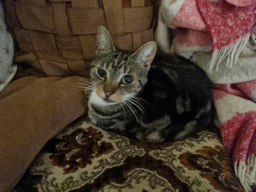

In [8]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(256)

In [9]:
# img = PILImage.create(list(uploader.value.values())[0]["content"]); img

## Graphviz Diagrams

In [20]:
# for darkreader...
from IPython.core.display import HTML
HTML("""
<style>
svg text { fill: #888; }
</style>
""")

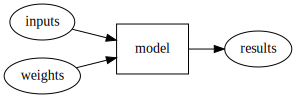

In [39]:
gv('''inputs->model->results
weights->model
model[shape=box width=1 height=.7]''')

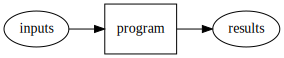

In [34]:
gv('''program[shape=box width=1 height=0.7]
inputs->program->results''')

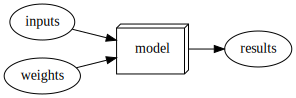

In [50]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')

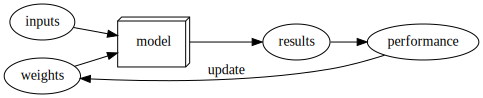

In [48]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

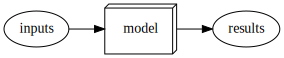

In [25]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

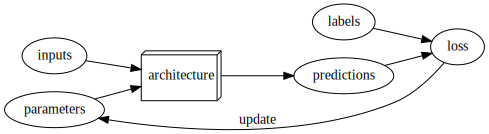

In [25]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

In [26]:
??gv

## Image Segmentation

In [27]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,time
0,2.797743,2.376938,00:01


epoch,train_loss,valid_loss,time
0,1.941889,1.473925,00:01
1,1.654466,1.300192,00:01
2,1.464796,0.901098,00:01
3,1.304250,0.927950,00:01
4,1.171126,0.704919,00:01
5,1.056883,0.658768,00:01
6,0.964656,0.646260,00:01
7,0.891684,0.641485,00:01


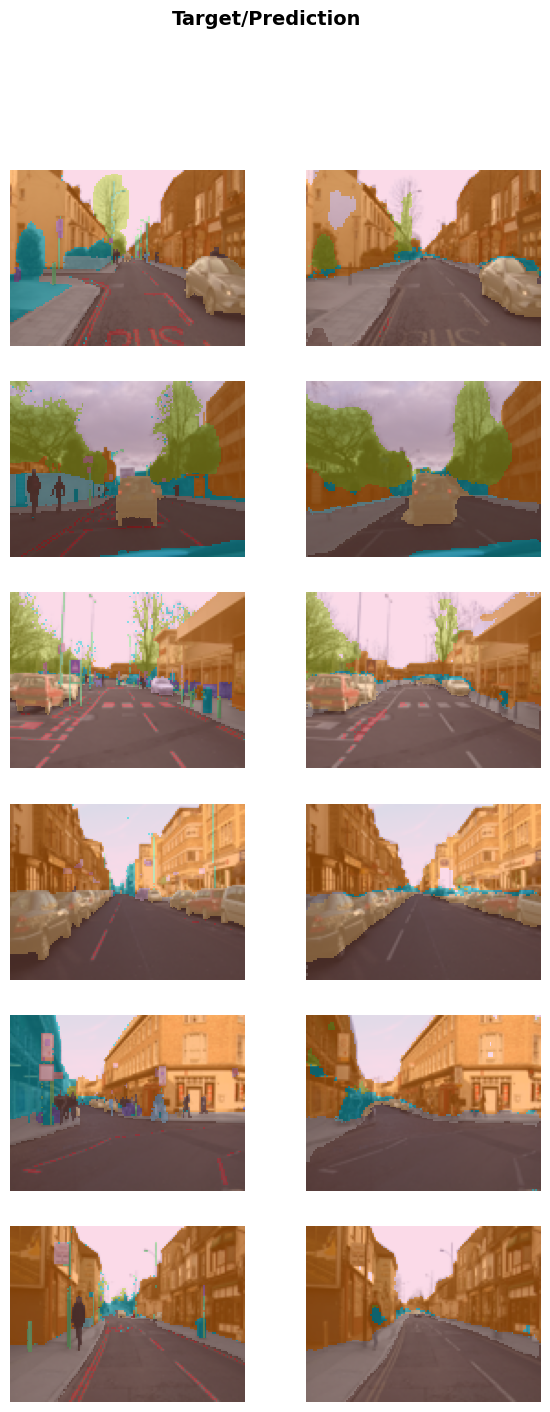

In [29]:
learn.show_results(max_n=6, figsize=(7,16))

## Tabular

In [5]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.376355,0.380672,0.826781,00:02
1,0.360835,0.360874,0.830620,00:02
2,0.338929,0.357915,0.831542,00:02


In [7]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,5.0,9.0,4.0,5.0,1.0,-1.506571,-0.676723,-0.030904,0.0,0.0
1,5.0,1.0,5.0,9.0,2.0,5.0,1.0,-1.213464,1.849529,-1.598626,0.0,0.0
2,5.0,12.0,5.0,2.0,2.0,5.0,1.0,-1.360017,-0.549297,-0.422835,0.0,0.0
3,5.0,12.0,5.0,7.0,2.0,3.0,1.0,-1.140188,0.419451,-0.422835,0.0,0.0
4,5.0,12.0,5.0,9.0,4.0,5.0,1.0,-1.433294,-0.049226,-0.422835,0.0,0.0
5,8.0,10.0,3.0,11.0,3.0,5.0,1.0,0.765003,-1.496788,1.144887,0.0,0.0
6,5.0,13.0,3.0,11.0,6.0,5.0,1.0,0.252067,-0.063372,1.536817,1.0,1.0
7,5.0,1.0,3.0,9.0,4.0,5.0,1.0,-0.993635,0.003849,-1.598626,0.0,0.0
8,5.0,12.0,7.0,2.0,2.0,5.0,1.0,1.277939,1.967982,-0.422835,0.0,0.0


## Recommendation: Collaborative Filtering

In [3]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.513691,1.427495,00:00


epoch,train_loss,valid_loss,time
0,1.385249,1.373847,00:00
1,1.279576,1.207591,00:00
2,1.036849,0.903280,00:00
3,0.810284,0.747287,00:00
4,0.693513,0.708249,00:00
5,0.642353,0.696831,00:00
6,0.624409,0.691099,00:00
7,0.602436,0.688767,00:00
8,0.607686,0.687762,00:00
9,0.603244,0.687566,00:00


In [4]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,1.0,57.0,4.0,3.886064
1,11.0,43.0,3.0,3.343190
2,47.0,49.0,4.0,4.193287
3,94.0,100.0,4.5,3.882685
4,70.0,3.0,3.0,4.212288
5,39.0,28.0,4.0,3.289741
6,54.0,64.0,2.5,3.668667
7,50.0,89.0,4.0,3.261880
8,53.0,52.0,4.0,4.241507


## Text Sentiment Analysis

In [2]:
from fastai.text.all import *

path = untar_data(URLs.IMDB)

In [3]:
path

Path('/home/sam/.fastai/data/imdb')

In [4]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=16)

2022-10-23 09:11:16.236201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 09:11:16.354923: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 09:11:17.461581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 09:11:17.464959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-23 09:11

This learner uses more GPU memory during fine tuning. Is it not freeing memory used from previous epochs?

Refer: https://forums.fast.ai/t/getting-cuda-oom-on-lesson3-imdb-notebook-with-a-bs-8/30080/15

bs=64 and bs=32 gave OOM on my 8GB card.
With bs=16, I got the following memory usage from the python3 process.

- Initial pass: 1556MiB
- 1st fine tuning epoch: 1556MiB
- 2nd fine tuning epoch: 6314MiB ... 6568MiB
- 3rd fine tuning epoch: 6568MiB
- 4th fine tuning epoch: 6568MiB

After it finishes, it did not free the GPU memory.

Supposedly it used to be possible to train it at bs=64 using less memory.

In [5]:
len(dls.items), len(dls.valid.items)

(25000, 25000)

In [12]:
train = False

In [13]:
if train:
    learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
    learn.fine_tune(4, 1e-2)

In [15]:
if train:
    learn.export(Path.cwd()/"imdb_sentiment.pkl")

In [17]:
if not train:
    learn = load_learner("imdb_sentiment.pkl")
    learn.dls = dls

In [35]:
learn.predict('''
This left me speechless......and not in a breath-taking "Shawshank
Redemption" type way!  I literally wanted to rip my arm off and throw it
at the TV it was so bad.  My husband and I made a bet with one another
as to who could keep watching it the longest........the loser buying
the weekend beers!  I was quite happy to lose that night.  I had no idea
what was going on, it kept skipping from one sketch to another with no
plot, no reason and NO POINT!  Awful acting, awful impressions, awful
film! Pretty much is what it says on the tin, A Disaster.  Do not watch
this movie.  You'd be better off stapling your genitals to a table for
an hour...it'll be less painful for you!
''')

('neg', tensor(0), tensor([0.9959, 0.0041]))

In [32]:
learn.predict('''
This film manages to redeem Hollywood in the eyes of people who feared
it long lost in a dark sea of clichés and predictability. Darabont
shows us that artists still work in the Hollywood studios and production
facilities. These artists show their capability to produce art; real
art that inspires you to look at the deeper aspects of life and the
world around you. The Shawshank Redemption delivers much-needed breath
of fresh air for anyone who realizes the capability of film. It proves
that masters of the craft still live on this earth, and still bless us
with timeless masterpieces that we will never forget.
''')

('pos', tensor(1), tensor([0.0131, 0.9869]))